In [1]:
"""Poniżej przedstawiono program, którego zadaniem jest stworzenie modelu predykcyjnego cen samochodów na podstawie danych z 
pliku 'AutoData.csv'. Przedstawiona jest analiza danych, a następnie dobór algorytmu regresji
i zapisanie najlepszych rezultatów w osobnym pliku modelu"""

"Poniżej przedstawiono program, którego zadaniem jest stworzenie modelu predykcyjnego cen samochodów na podstawie danych z \npliku 'AutoData.csv'. Przedstawiona jest analiza danych, a następnie dobór algorytmu regresji\ni zapisanie najlepszych rezultatów w osobnym pliku modelu"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [3]:
df = pd.read_csv('AutoData.csv')
df1 = df.copy()
df

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [5]:
df.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# Jak widać wszystkie komórki są uzupełnione danymi i nigdzie nie brakuje 

In [7]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


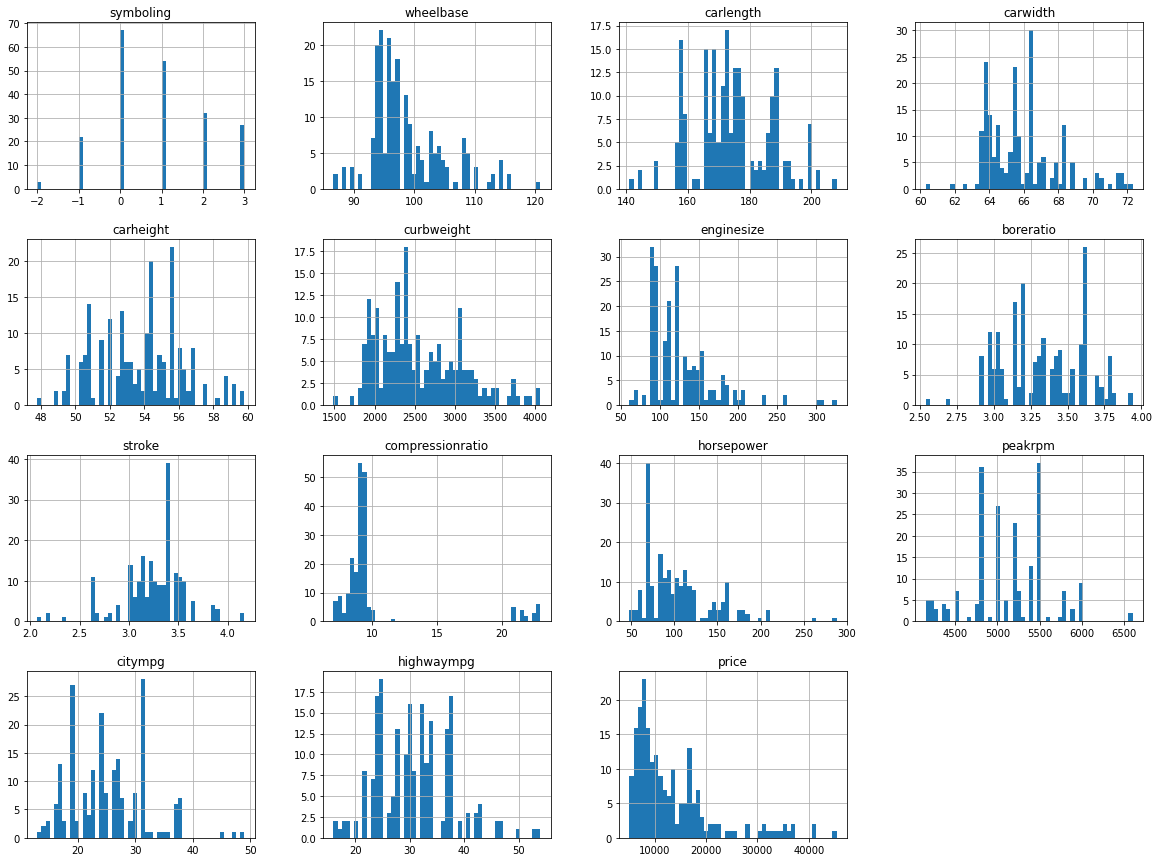

In [8]:
df.hist(bins=50,figsize=(20,15))
plt.show()

### Określanie Korelacja Pearsona
Czyli określanie zależności liniowych między zmiennymi
#### 0 - brak korelacji
#### 1- silna korelacja, gdy jedno rośnie, drugie też rośnie
#### -1 - gdy jedno rośnie drugi maleje, silna korelacja

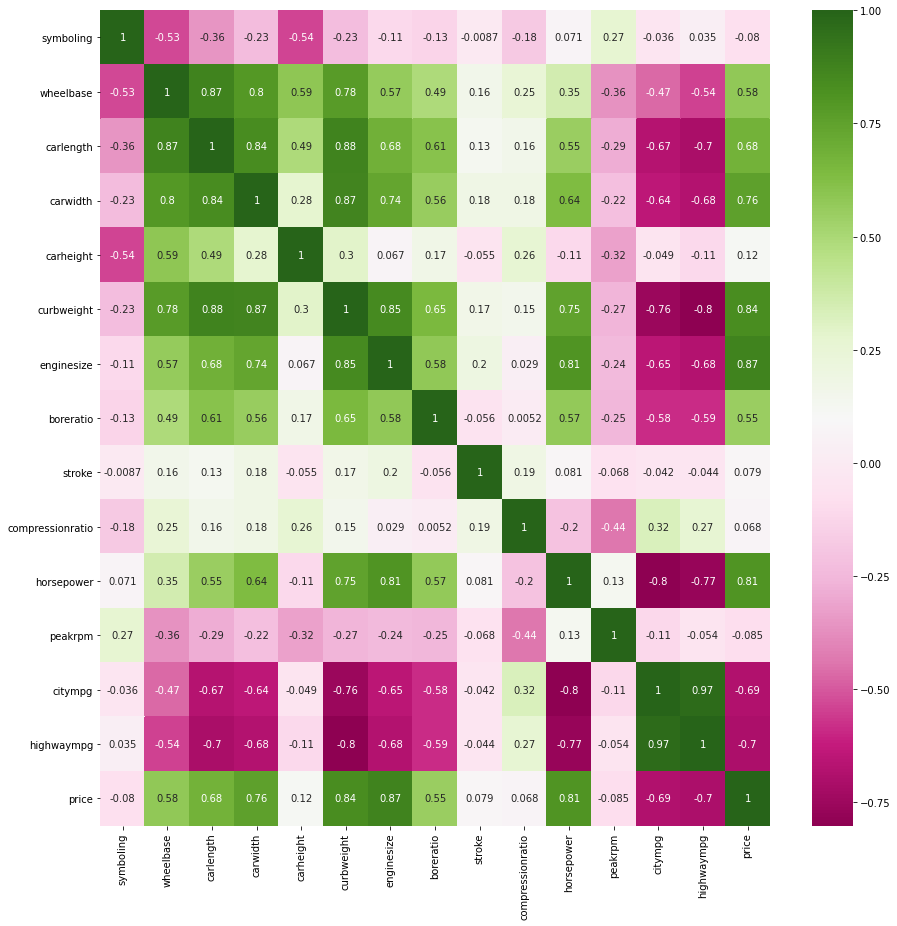

In [9]:
corelation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corelation_matrix, annot=True, cmap="PiYG")
plt.show()

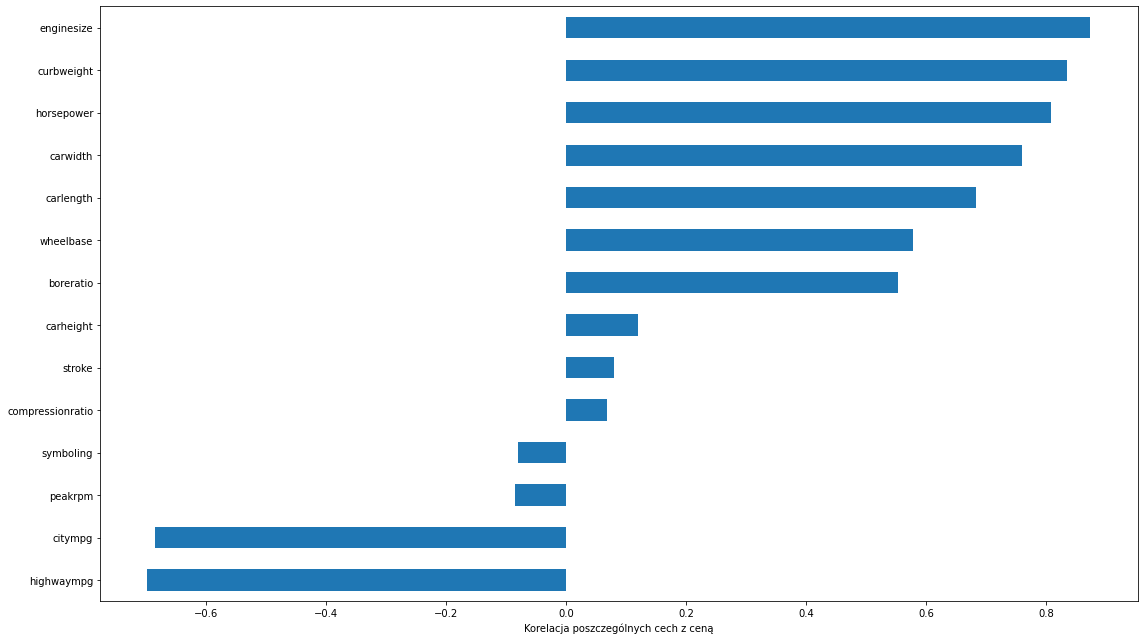

In [10]:
corr = df.corr()
plt.figure(figsize=(16,9));
corr["price"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.xlabel("Korelacja poszczególnych cech z ceną")
plt.tight_layout()
plt.show()

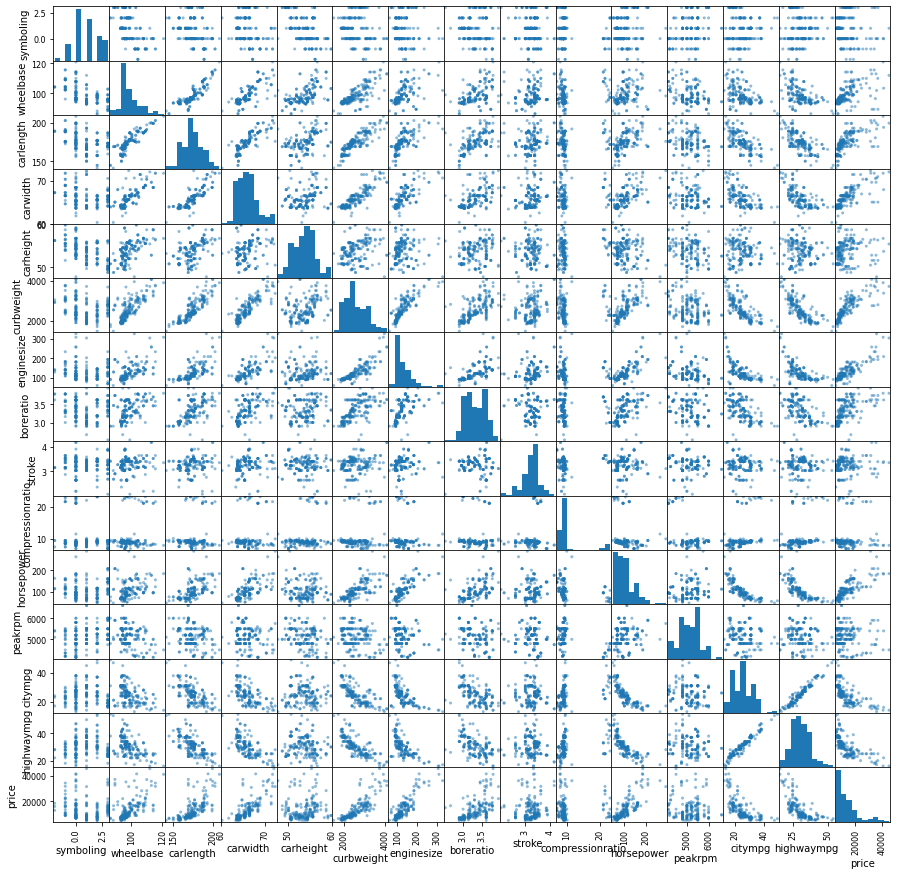

In [11]:
scatter_matrix(df,figsize=(15,15))
plt.show()

In [12]:
def draw_subplots(x,y,column):
    sns.regplot(ax=ax[x,y], data=df, x=column, y='price')

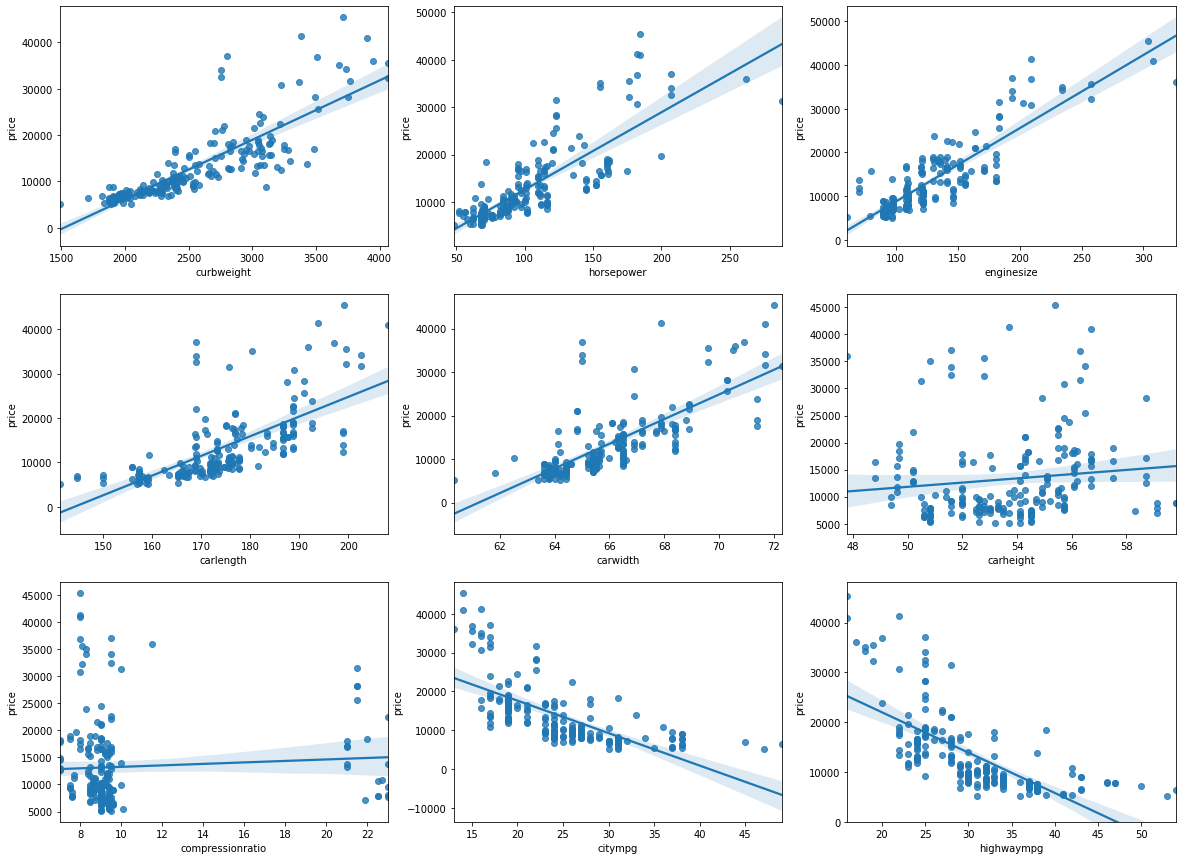

In [13]:
fig, ax = plt.subplots(3,3,figsize=(20,15))
draw_subplots(0,0,'curbweight')
draw_subplots(0,1,'horsepower')
draw_subplots(0,2,'enginesize')
draw_subplots(1,0,'carlength')
draw_subplots(1,1,'carwidth')
draw_subplots(1,2,'carheight')
draw_subplots(2,0,'compressionratio')
draw_subplots(2,1,'citympg')
draw_subplots(2,2,'highwaympg')
plt.ylim(0,)
plt.show()

# Wyświetlanie danych nienumerycznych 


In [14]:
# Ponieważ dane zawierają równiez dane tekstowe, nie można w taki łatwy sposób przdstawić ich tak jak na powyższych wykresach 
# dlatego też zostaną one zaprezentowane na wykresach "boxplot"

In [15]:
def draw_subplots_box(x,y,column):
    sns.boxplot(ax=ax[x,y], data=df, x=column, y='price')

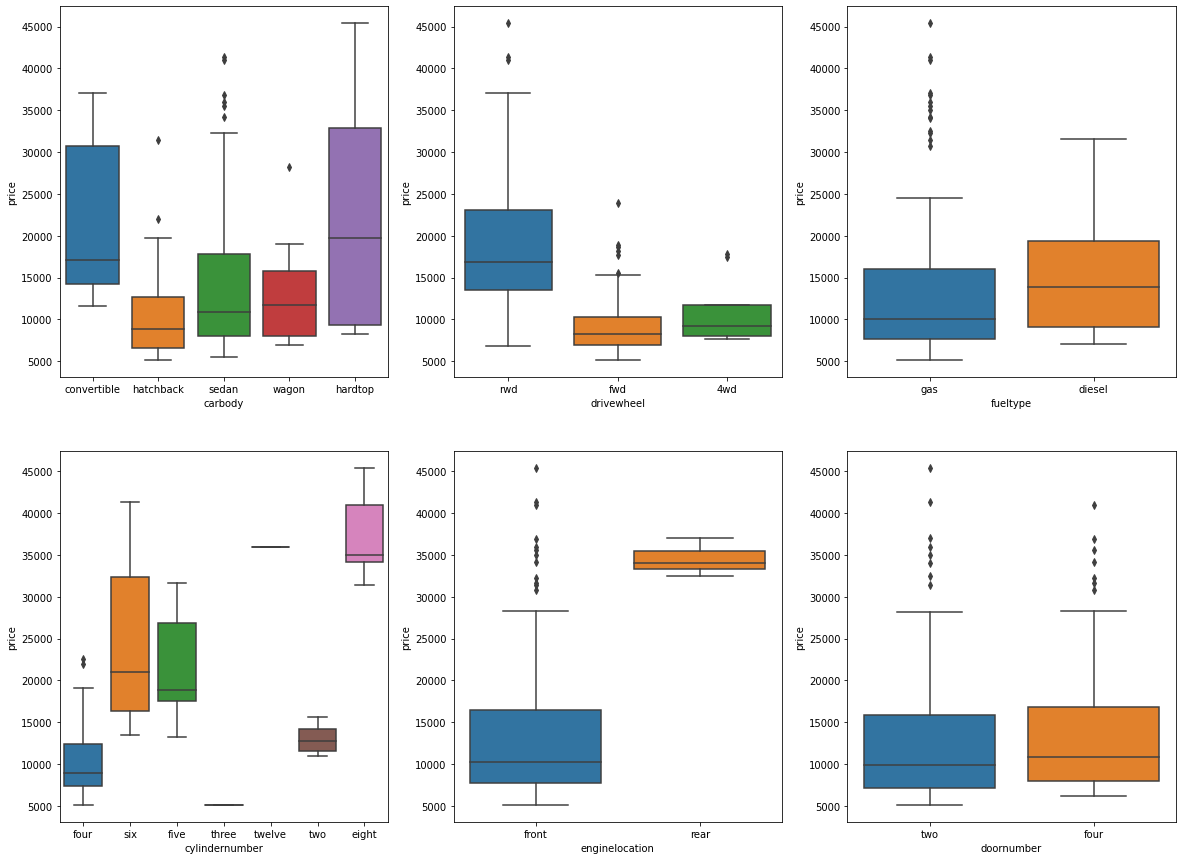

In [16]:
fig, ax = plt.subplots(2,3,figsize=(20,15))
draw_subplots_box(0,0,'carbody')
draw_subplots_box(0,1,'drivewheel')
draw_subplots_box(0,2,'fueltype')
draw_subplots_box(1,0,'cylindernumber')
draw_subplots_box(1,1,'enginelocation')
draw_subplots_box(1,2,'doornumber')

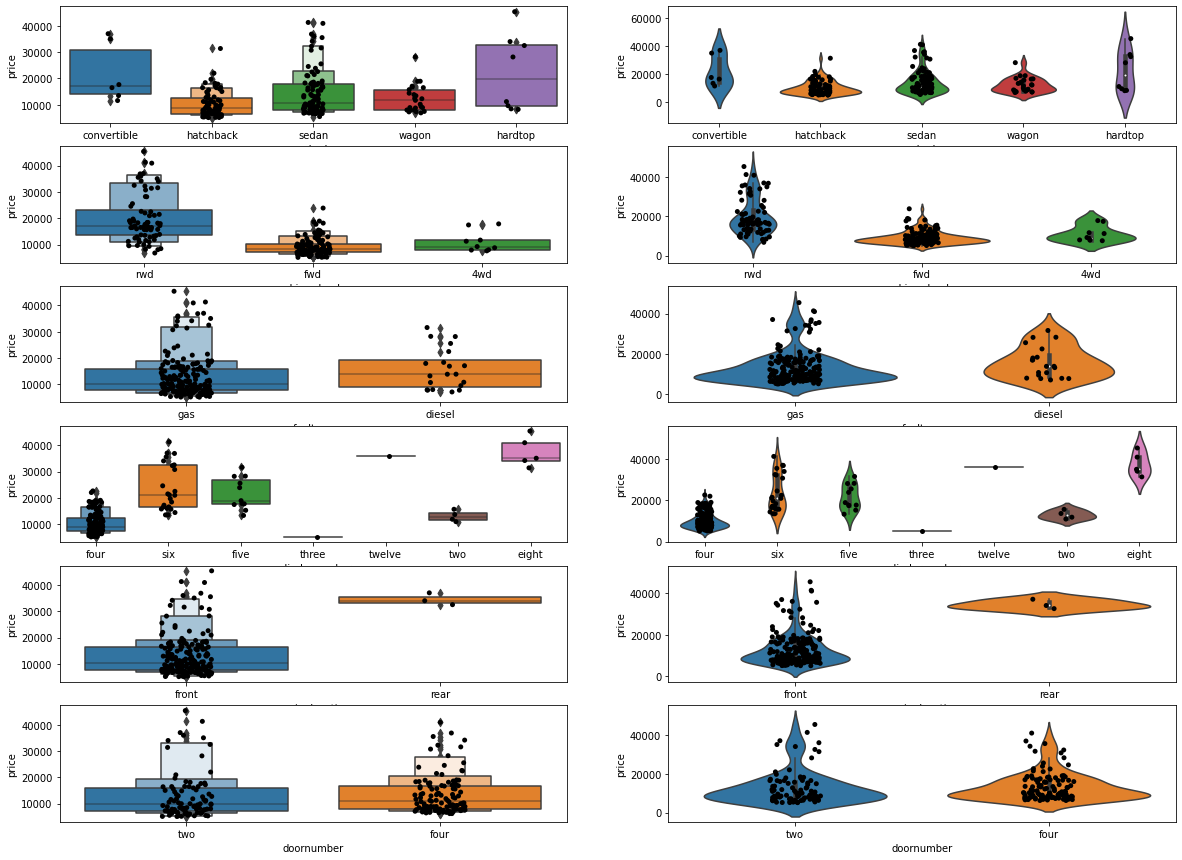

In [17]:
fig, ax = plt.subplots(6,2,figsize=(20,15))
ax_x = 0
for col in df[['carbody','drivewheel','fueltype','cylindernumber','enginelocation','doornumber']]:
    sns.boxenplot(ax=ax[ax_x,0], x=col,y='price',data=df)
    sns.stripplot(ax=ax[ax_x,0], x=col,y='price',data=df,color='Black')
    ax[ax_x,0].set_xlabel(col)
    ax[ax_x,0].set_ylabel('price')
    sns.violinplot(ax=ax[ax_x,1], x=col,y='price',data=df)
    sns.stripplot(ax=ax[ax_x,1], x=col,y='price',data=df,color='Black')
    ax[ax_x,1].set_xlabel(col)
    ax[ax_x,1].set_ylabel('price')
    ax_x += 1
    
plt.show()

In [18]:
# w atrybutach tekstowych istnieje ogarniaczona liczba wartości dlatego też można je zamienić na dane liczbowe

In [19]:
encod_nums = {'fueltype': {"diesel" : 0, 'gas' : 1},
              'doornumber': {"four" : 4, 'two' : 2},
              'enginelocation' : {"front" : 0,"rear" : 1},
              'cylindernumber' : {"two" : 2,"three" :3, "four" : 4, "five" : 5, "six" : 6, "eight" :8, "twelve": 12},
              'aspiration' : { "std" : 0, "turbo" : 1}}
df = df.replace(encod_nums)
df

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,1,0,2,convertible,rwd,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,1,0,2,convertible,rwd,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,1,0,2,hatchback,rwd,0,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,1,0,4,sedan,fwd,0,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,1,0,4,sedan,4wd,0,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),1,0,4,sedan,rwd,0,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,1,1,4,sedan,rwd,0,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,1,0,4,sedan,rwd,0,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,0,1,4,sedan,rwd,0,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [20]:
## W przypadku brakujących danych, zostają one uzupełniane medianą

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
imputer = SimpleImputer(strategy="median")
imputer.fit(df.drop(['enginetype','carbody','drivewheel','fuelsystem','make'],axis=1))

SimpleImputer(strategy='median')

In [23]:
for col in ['carbody','drivewheel','fuelsystem','enginetype']:
    cat_encoder = OneHotEncoder()
    feauters_cat = cat_encoder.fit_transform(df[[col]])
    df = df.join(pd.DataFrame(feauters_cat.toarray(),columns=cat_encoder.categories_))
df

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,"(mpfi,)","(spdi,)","(spfi,)","(dohc,)","(dohcv,)","(l,)","(ohc,)","(ohcf,)","(ohcv,)","(rotor,)"
0,3,alfa-romero giulia,1,0,2,convertible,rwd,0,88.6,168.8,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,alfa-romero stelvio,1,0,2,convertible,rwd,0,88.6,168.8,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,alfa-romero Quadrifoglio,1,0,2,hatchback,rwd,0,94.5,171.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,audi 100 ls,1,0,4,sedan,fwd,0,99.8,176.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2,audi 100ls,1,0,4,sedan,4wd,0,99.4,176.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),1,0,4,sedan,rwd,0,109.1,188.8,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
201,-1,volvo 144ea,1,1,4,sedan,rwd,0,109.1,188.8,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
202,-1,volvo 244dl,1,0,4,sedan,rwd,0,109.1,188.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
203,-1,volvo 246,0,1,4,sedan,rwd,0,109.1,188.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
df_num = df.copy()
df = df.drop(['carbody','drivewheel','fuelsystem','enginetype'],axis=1)
df

,symboling,make,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,"(mpfi,)","(spdi,)","(spfi,)","(dohc,)","(dohcv,)","(l,)","(ohc,)","(ohcf,)","(ohcv,)","(rotor,)"
0,3,alfa-romero giulia,1,0,2,0,88.6,168.8,64.1,48.8,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,alfa-romero stelvio,1,0,2,0,88.6,168.8,64.1,48.8,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,alfa-romero Quadrifoglio,1,0,2,0,94.5,171.2,65.5,52.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,audi 100 ls,1,0,4,0,99.8,176.6,66.2,54.3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2,audi 100ls,1,0,4,0,99.4,176.6,66.4,54.3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),1,0,4,0,109.1,188.8,68.9,55.5,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
201,-1,volvo 144ea,1,1,4,0,109.1,188.8,68.8,55.5,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
202,-1,volvo 244dl,1,0,4,0,109.1,188.8,68.9,55.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
203,-1,volvo 246,0,1,4,0,109.1,188.8,68.9,55.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Nie wiem czemu ale nie działają mi te transformery

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [26]:
#int_attribs = ['fueltype','doornumber','enginelocation','cylindernumber','aspiration']
#cat_attribs = ['carbody','drivewheel','fuelsystem']
#num_atribs = df.drop(int_attribs + cat_attribs,axis=1)

#first_pipeline = Pipeline([
#    ('imputer', SimpleImputer(strategy='median'),num_atribs),
#    ('std_scaler', StandardScaler())
#])

#pipeline = ColumnTransformer([
#    ('num', first_pipeline, num_atribs),
#    ('cat1',OrdinalEncoder(),int_attribs),
#    ('cat2',OneHotEncoder(),cat_attribs)
#])
#df_prepared = pipeline.fit_transform(df1)
#print(df_prepared)

In [27]:
df = df.drop('make',axis=1)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
df_columns = df.columns
df = scalar.fit_transform(df)
df = pd.DataFrame(df)
df.columns = df_columns
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,"(mpfi,)","(spdi,)","(spfi,)","(dohc,)","(dohcv,)","(l,)","(ohc,)","(ohcf,)","(ohcv,)","(rotor,)"
0,1.0,1.0,0.0,0.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.6,1.0,0.0,0.0,0.0,0.230321,0.449254,0.433333,0.383333,0.517843,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.8,1.0,0.0,1.0,0.0,0.384840,0.529851,0.491667,0.541667,0.329325,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.8,1.0,0.0,1.0,0.0,0.373178,0.529851,0.508333,0.541667,0.518231,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
train_X, test_X, train_y, test_y = train_test_split(df.drop(['price'],axis=1),df['price'], test_size=0.2, random_state=42)

## Model Regresji liniowej

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lin_reg = LinearRegression()

In [32]:
lin_reg.fit(train_X, train_y)

LinearRegression()

#### Pomiar będu średnio kwadratowego (Root Mean Square Error)
- mean absolute error - średni błąd bezwzględny $MAE = \frac{1}{m} \Sigma_{j=1}^m |y^j - \hat{y}^j|$ - mniej wrażliwy na obserwacje odstające niż błąd średniokwadratowy
- r2_score - $R^2$ mierzy jaką część wariancji zmiennej wyjściowej wyjaśnia model (0 model nic nie wyjaśnia, 1 model idealny) 

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
linear_prediction = lin_reg.predict(train_X)
lin_reg_mse = mean_squared_error(train_y,linear_prediction) 
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_rmse

0.046310116905730586

## Współczynnik determinacji $R^2$

miara jakości dopasowania modelu liniowego (również wyliczane przez funkcję score w sklearn.linear_model.LinearRegression)

$$ R^2 = 1 - \frac{\Sigma_{i=1}^n (y_i - \hat{y}_i)^2}{\Sigma_{i=1}^n (y_i - \overline{y})^2} $$

In [35]:
r2_score(train_y,linear_prediction)

0.9416485142679573

#### Testowanie modelu na zbierze testowym 
#### Sprawdzian krzyżowy
Zastosowanie Kroswalidacji


In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
r2_score(test_y,lin_reg.predict(test_X))

0.8267534112744588

In [38]:
lin_reg_score = cross_val_score(lin_reg, test_X, test_y, scoring= "neg_root_mean_squared_error",cv=10 )
print("Średni błąd krzyżowy policzony z 10 przedziałów wynosi: " + str(lin_reg_score.mean()))
print("Odchylenie standarowe błędu wynosi: " + str(lin_reg_score.std()))


Średni błąd krzyżowy policzony z 10 przedziałów wynosi: -0.2957970167251497
Odchylenie standarowe błędu wynosi: 0.1953180758248309


## Model drzewa decyzyjnego 


In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_X, train_y)

DecisionTreeRegressor()

In [41]:
tree_prediction = tree_reg.predict(train_X)
tree_mse = mean_squared_error(train_y,tree_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.007034268160946753

In [42]:
r2_score(train_y,tree_prediction)

0.9986537119069865

#### Sprawdzian krzyżowy
Zastosowanie Kroswalidacji


In [43]:
r2_score(test_y,tree_reg.predict(test_X))

0.9053640836983233

In [44]:
tree_score = cross_val_score(tree_reg,test_X, test_y,scoring= "neg_root_mean_squared_error",cv=10)
print("Średni błąd krzyżowy policzony z 10 przedziałów wynosi: " + str(tree_score.mean()))
print("Odchylenie standarowe błędu wynosi: " + str(tree_score.std()))

Średni błąd krzyżowy policzony z 10 przedziałów wynosi: -0.09308822854090962
Odchylenie standarowe błędu wynosi: 0.06679672105612464


## Model Lasu Losowego


In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
forest_reg = RandomForestRegressor()
forest_reg.fit(train_X, train_y)

RandomForestRegressor()

In [47]:
forest_prediction = forest_reg.predict(train_X)
forest_mse = mean_squared_error(train_y,forest_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.02304823375786714

In [48]:
r2_score(train_y,forest_prediction)

0.9855464188989967

#### Sprawdzian krzyżowy
Zastosowanie Kroswalidacji


In [49]:
r2_score(test_y,forest_reg.predict(test_X))

0.9567617319263243

In [50]:
forest_score = cross_val_score(forest_reg,test_X, test_y,scoring= "neg_root_mean_squared_error",cv=10)
print("Średni błąd krzyżowy policzony z 10 przedziałów wynosi: " + str(forest_score.mean()))
print("Odchylenie standarowe błędu wynosi: " + str(forest_score.std()))

Średni błąd krzyżowy policzony z 10 przedziałów wynosi: -0.07891173915369269
Odchylenie standarowe błędu wynosi: 0.048860330420326274


## Model regresji wektorów skośnych SVR


In [51]:
from sklearn.svm import SVR

In [52]:
svr_reg = SVR()
svr_reg.fit(train_X, train_y)

SVR()

In [53]:
svr_prediction = svr_reg.predict(train_X)
svr_mse = mean_squared_error(train_y,svr_prediction)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

0.06756095173327366

In [54]:
r2_score(train_y,svr_prediction)

0.8758085546441794

#### Sprawdzian krzyżowy
Zastosowanie Kroswalidacji


In [55]:
r2_score(test_y,svr_reg.predict(test_X))

0.8194009395210162

In [56]:
svr_score = cross_val_score(svr_reg,test_X, test_y,scoring= "neg_root_mean_squared_error",cv=10)
print("Średni błąd krzyżowy policzony z 10 przedziałów wynosi: " + str(svr_score.mean()))
print("Odchylenie standarowe błędu wynosi: " + str(svr_score.std()))

Średni błąd krzyżowy policzony z 10 przedziałów wynosi: -0.13199088132158437
Odchylenie standarowe błędu wynosi: 0.05815353640268731


# Regresja wielomianowa

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
# zdefiniowanie funckji dzięki którj łatwiej będzie ocenić rodzaj modelu wybrany dla tych danych
def poly_reg(x, y, x_test, y_test, n, reg):
    poly = PolynomialFeatures(n)
    X = poly.fit_transform(x)
    X_test = poly.fit_transform(x_test)
    regresion = reg
    regresion.fit(X,y)
    prediction = regresion.predict(X)
    pred_mse = mean_squared_error(y,prediction)
    pred_rmse = np.sqrt(pred_mse)
    print("Błąd średniokwadratowy RMSE wynik: " + str(pred_rmse))
    print("Współczynnik determinacji modelu R^2 dla zbioru uczącego wynosi: " + str(r2_score(y,prediction)))
    print("\nTestowanie modelu dla zbioru testowego")
    # Sprawdzian krzyżowy (kroswalidacja)
    reg_score = cross_val_score(regresion,x_test, y_test,scoring= "neg_root_mean_squared_error",cv=10)
    print("Średni błąd krzyżowy policzony z 10 przedziałów wynosi: " + str(reg_score.mean()))
    print("Odchylenie standarowe błędu wynosi: " + str(reg_score.std()))
    print(f"Wielkość wielomianu to: {n}")
   

In [59]:
poly_reg(train_X, train_y, test_X, test_y, 2, LinearRegression())

Błąd średniokwadratowy RMSE wynik: 0.007034277569595692
Współczynnik determinacji modelu R^2 dla zbioru uczącego wynosi: 0.9986537083055428

Testowanie modelu dla zbioru testowego
Średni błąd krzyżowy policzony z 10 przedziałów wynosi: -0.2957970167251497
Odchylenie standarowe błędu wynosi: 0.1953180758248309
Wielkość wielomianu to: 2


In [60]:
poly_reg(train_X, train_y, test_X, test_y, 4, LinearRegression())

Błąd średniokwadratowy RMSE wynik: 0.01916005299239936
Współczynnik determinacji modelu R^2 dla zbioru uczącego wynosi: 0.9900116540572372

Testowanie modelu dla zbioru testowego
Średni błąd krzyżowy policzony z 10 przedziałów wynosi: -0.2957970167251497
Odchylenie standarowe błędu wynosi: 0.1953180758248309
Wielkość wielomianu to: 4


## 

### Najlepsze wyniki uzyskano dla modelu lasu losowego, dlatego też ten model zostanie zapisany
Współczynnik determinacji modelu wyszedł: 0.9587570442998175 

Średni błąd krzyżowy policzony z 10 przedziałów wynosi: -0.07319840532422861

Odchylenie standarowe błędu wynosi: 0.04683573530429169

In [61]:
import joblib

In [62]:
joblib.dump(forest_reg, "model_predykcji_cen_samochodu.pkl")

['model_predykcji_cen_samochodu.pkl']